<a href="https://colab.research.google.com/github/poojashreeNS/Dimensionality_Reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np
import pandas as pd
import time

In [177]:
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [179]:
#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#LLE
from sklearn.manifold import LocallyLinearEmbedding as LLE
#Isomap
from sklearn.manifold import Isomap
#SVD
from sklearn.decomposition import TruncatedSVD

In [ ]:
train = pd.read_csv('/content/sign_mnist_test.csv')
train.head()

# **Dimensionality Reduction on Tabular dataset**

### **Plot functions**

In [ ]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=10,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [ ]:
def plot_3d(component1,component2,component3):

  fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=5,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
  # tight layout
  fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
  fig.layout.template = 'plotly_dark'
    
  fig.show()

### **Standardizing** **dataset**

In [ ]:
#picking only the first 10 labels
train = train[train['label'] < 10]
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

In [ ]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

### **Implementing PCA**

In [ ]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Duration: 0.3520987033843994 seconds


PCA_2D

In [ ]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

PCA_3D

In [ ]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

### **Implementing t-SNE**

In [ ]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 37.894346475601196 seconds


t-SNE_2D

In [ ]:
plot_2d(tsne[:, 0],tsne[:, 1])

t-SNE_3D

In [ ]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

### **Implementation of UMAP**

In [ ]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

UMAP_2D

In [ ]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

UMAP_3D

In [ ]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

### **Implementation of LLE**

In [ ]:
def run_lle(num_neighbors, dims, mthd, data):
    # Specify LLE parameters
    embed_lle = LLE(n_neighbors=num_neighbors,
                    n_components=dims, 
                    reg=0.001,
                    eigen_solver='auto',
                    method=mthd, 
                    modified_tol=1e-12,
                    neighbors_algorithm='auto',
                    random_state=42,
                    n_jobs=-1
                   )
    # Fit and transofrm the data
    result = embed_lle.fit_transform(data)
    
    # Return results
    return result

LLE_2D

In [ ]:
std_lle_res=run_lle(num_neighbors=30, dims=2, mthd='standard', data=x)
plot_2d(std_lle_res[:, 0],std_lle_res[:, 1] )

LLE_3D

In [ ]:
std_lle_res=run_lle(num_neighbors=30, dims=3, mthd='modified', data=x)
plot_3d(std_lle_res[:, 0], std_lle_res[:, 1], std_lle_res[:, 2])

### **Implementation of Isomap**

In [277]:
def run_isomap(num_neighbors, dims, data):
    # Specify Isomap parameters
    embed_isomap = Isomap(n_neighbors=num_neighbors, n_components=dims, n_jobs=-1)
    
    # Fit and transofrm the data
    result = embed_isomap.fit_transform(data)
    
    # Return results
    return result    

Isomap_2D

In [278]:
isomap_res=run_isomap(num_neighbors=30, dims=2, data=x)
plot_2d(isomap_res[:, 0], isomap_res[:, 1])

Isomap_3D

In [279]:
isomap_res=run_isomap(num_neighbors=30, dims=3, data=x)
plot_3d(isomap_res[:,0], isomap_res[:, 1], isomap_res[:, 2])

### **Implementation of SVD**

In [ ]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(x)
plot_2d(X_reduced[:, 0], X_reduced[:, 1])

In [ ]:
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(x)
plot_3d(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])

# **Dimensionality Reduction on Image dataset**

Prepare Dataset

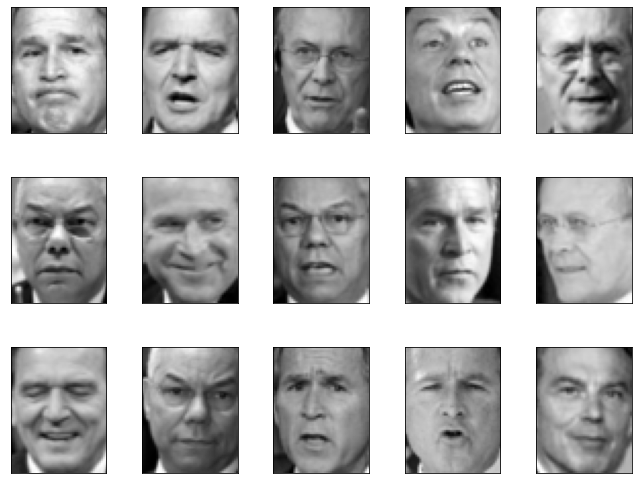

In [215]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 100)

def plot_gallery(images, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((62, 47)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(faces.images)

### **Plot function**

In [269]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### **PCA**

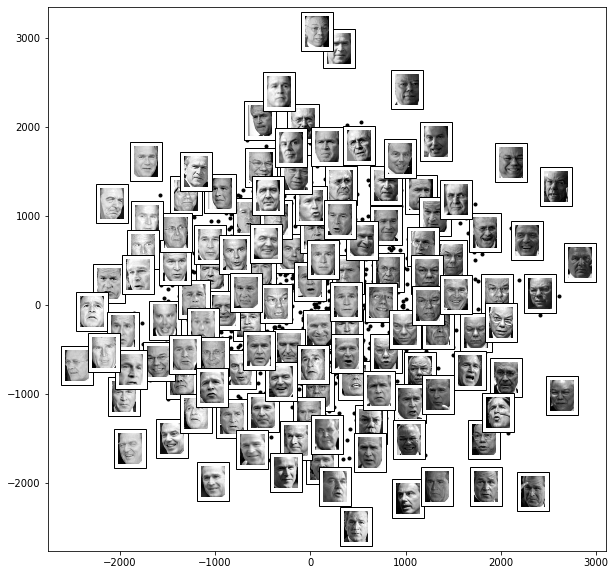

In [274]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=PCA(n_components=2),
                images=faces.images[:, ::2, ::2])

### **SVD**

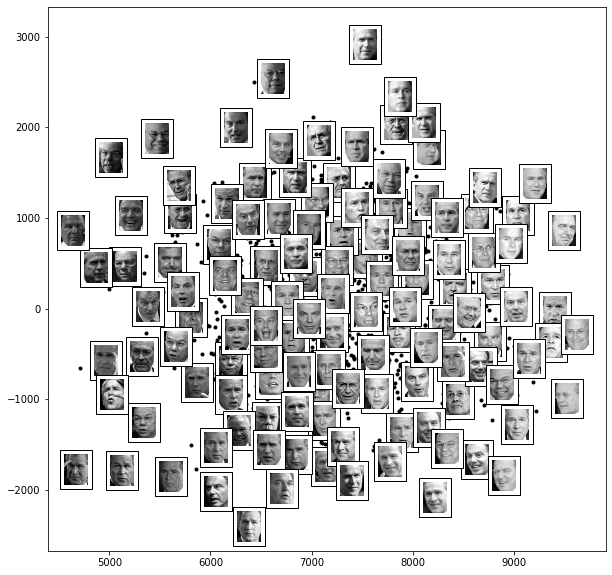

In [275]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=TruncatedSVD(n_components=2),
                images=faces.images[:, ::2, ::2])

### **LLE**

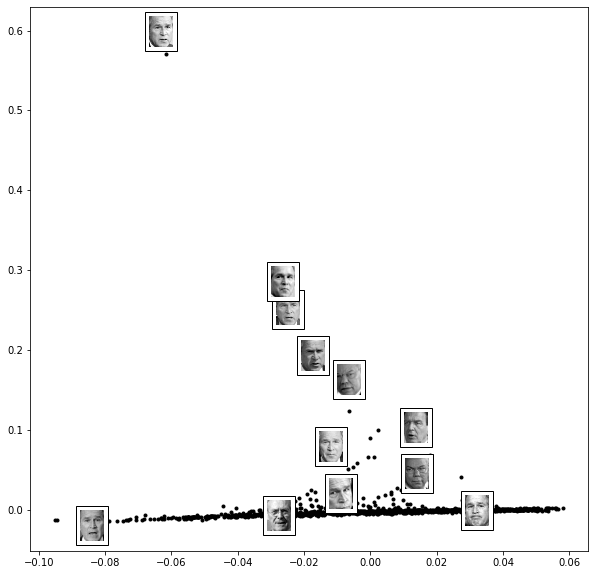

In [276]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=LLE(n_components=2),
                images=faces.images[:, ::2, ::2])

### **t-SNE**

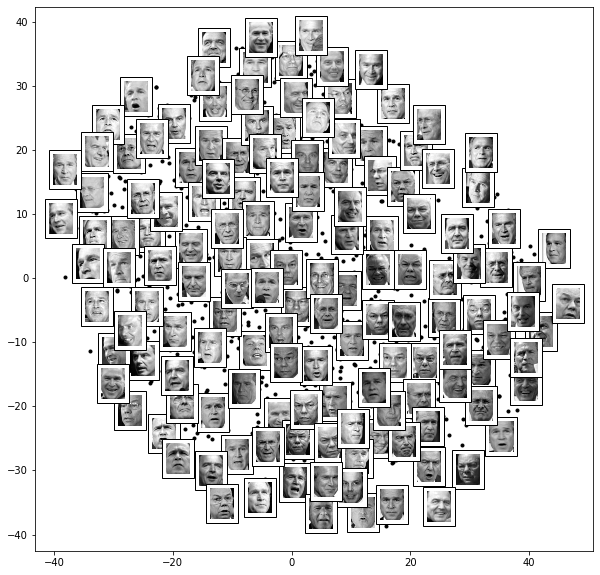

In [272]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=TSNE(n_components=2),
                images=faces.images[:, ::2, ::2])

### **UMap**

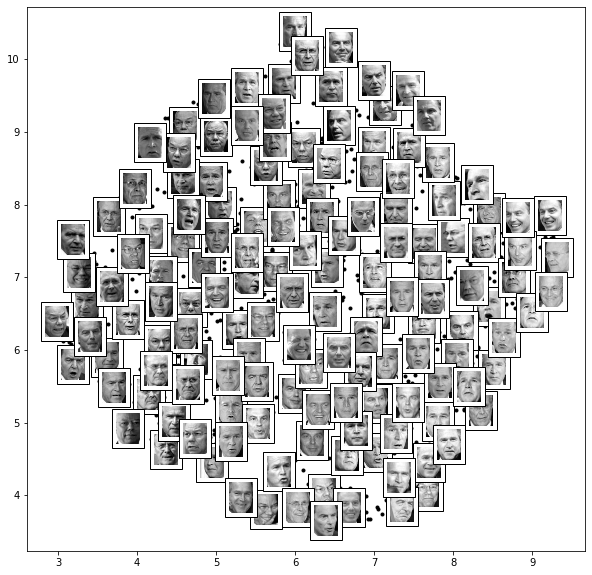

In [271]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=umap.UMAP(n_components=2),
                images=faces.images[:, ::2, ::2])

### **ISOMap**

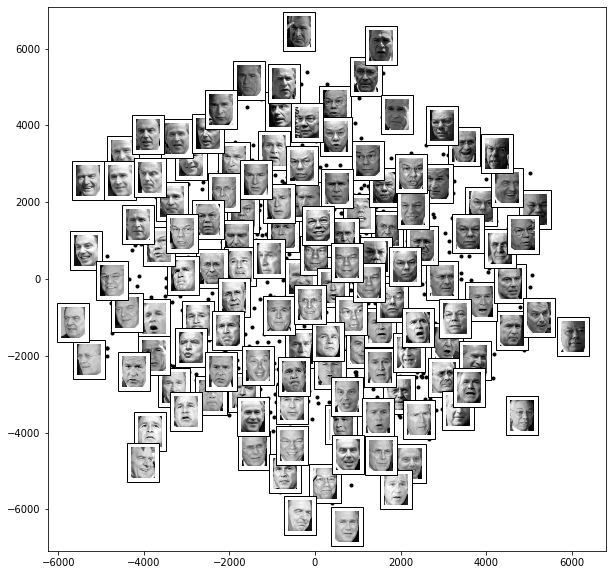

In [270]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])